In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Choose a dataset

In [2]:
df_employees = pd.read_csv('employee.csv')

In [3]:
df_employees.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df_employees.columns.values

array(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype=object)

In [5]:
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


We can see that we don't have NULL values in our data set

In [6]:
df_employees.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [7]:
df_employees.shape

(4653, 9)

a.	We chose the Employee Future Prediction dataset.
<br><br>
b.	The dataset tries to predict the employee's future in the company. The dataset has personal information about the company's employees (such as education level, sex, age…), as well as professional information (payment tier, experience in current domain…). In addition, the data contains the prediction of whether the employee would leave the company in the next 2 years.
<br>

c. <br>
1. Education - employee's degree - Bachelors, Masters, PHD (Categorial).
2. JoiningYear - The year the employee joined the company (Categorial).
3. City - City office where posted
4. PaymentTier - 
5. Age - Current age
6. Gender - Gender of employee
7. EverBenched - Ever kept out of projects for 1 month or more
8. ExperienceInCurrentDomain - Experience in current field
9. LeaveOrNot - Whether employee leaves the company in next 2 years.

In [10]:
print(f"d. The data set has {df_employees.shape[0]} records")

d. The data set has 4653 records


# 2. Exploratory data analysis

In [11]:
df_employees["Age"].unique()

array([34, 28, 38, 27, 24, 22, 23, 37, 32, 39, 29, 30, 36, 31, 25, 26, 40,
       35, 33, 41], dtype=int64)

In [12]:
df_employees["Education"].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [13]:
df_employees["JoiningYear"].unique()

array([2017, 2013, 2014, 2016, 2015, 2012, 2018], dtype=int64)

First, we wanted to make 2 changes in our data:
<br>
    (a) We flipped the PaymentTier's values in a wayu that a higher number means a higher salary (0-2). Then changed its name to "SalaryLevel" in order to distinguish between the 2 variables.
    <br>
    (b) We changed the education classes to numbers :'Bachelors': 1, 'Masters': 2, 'PHD': 3 

In [14]:
df_employees.replace({'Education': {'Bachelors': 1, 'Masters': 2, 'PHD': 3}}, inplace=True)
df_employees["PaymentTier"]=3- df_employees["PaymentTier"]
df_employees.rename(columns = {'PaymentTier':'SalaryLevel'}, inplace = True)
df_employees["SalaryLevel"]=df_employees["SalaryLevel"].astype(int)
df_employees

,Education,JoiningYear,City,SalaryLevel,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,1,2017,Bangalore,0,34,Male,No,0,0
1,1,2013,Pune,2,28,Female,No,3,1
2,1,2014,New Delhi,0,38,Female,No,2,0
3,2,2016,Bangalore,0,27,Male,No,5,1
4,2,2017,Pune,0,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,1,2013,Bangalore,0,26,Female,No,4,0
4649,2,2013,Pune,1,37,Male,No,2,1
4650,2,2018,New Delhi,0,27,Male,No,5,1
4651,1,2012,Bangalore,0,30,Male,Yes,2,0


After those changes, it would be easier to see tendencies via plots.

Now, we would like to separate the data to personal information and proffessional information.
<br>
In addition, we seperated the Observations to males and females.
<br><br>
We don't know right know if those datas will help us, but we thought it's a good thing to have for thew start

In [15]:
df_personal_info=df_employees[["Education", "City", "Age", "Gender"]] #personal information
df_pro_info=df_employees[["JoiningYear", "SalaryLevel", "EverBenched", "ExperienceInCurrentDomain"]] #proffessional information
df_personal_info

,Education,City,Age,Gender
0,1,Bangalore,34,Male
1,1,Pune,28,Female
2,1,New Delhi,38,Female
3,2,Bangalore,27,Male
4,2,Pune,24,Male
...,...,...,...,...
4648,1,Bangalore,26,Female
4649,2,Pune,37,Male
4650,2,New Delhi,27,Male
4651,1,Bangalore,30,Male


In [16]:
df_males= df_employees.loc[df_employees["Gender"] == "Male"]
df_females= df_employees.loc[df_employees["Gender"] == "Female"]
df_males

,Education,JoiningYear,City,SalaryLevel,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,1,2017,Bangalore,0,34,Male,No,0,0
3,2,2016,Bangalore,0,27,Male,No,5,1
4,2,2017,Pune,0,24,Male,Yes,2,1
5,1,2016,Bangalore,0,22,Male,No,0,0
6,1,2015,New Delhi,0,38,Male,No,0,0
...,...,...,...,...,...,...,...,...,...
4647,1,2016,Pune,0,30,Male,No,2,0
4649,2,2013,Pune,1,37,Male,No,2,1
4650,2,2018,New Delhi,0,27,Male,No,5,1
4651,1,2012,Bangalore,0,30,Male,Yes,2,0


In [17]:
df_pro_info.head()

,JoiningYear,SalaryLevel,EverBenched,ExperienceInCurrentDomain
0,2017,0,No,0
1,2013,2,No,3
2,2014,0,No,2
3,2016,0,No,5
4,2017,0,Yes,2


In [18]:
df_personal_info.head()

,Education,City,Age,Gender
0,1,Bangalore,34,Male
1,1,Pune,28,Female
2,1,New Delhi,38,Female
3,2,Bangalore,27,Male
4,2,Pune,24,Male


Now, we can start to analyse our data

## a. 

We'll try to see if there is a difference in the company by gender:

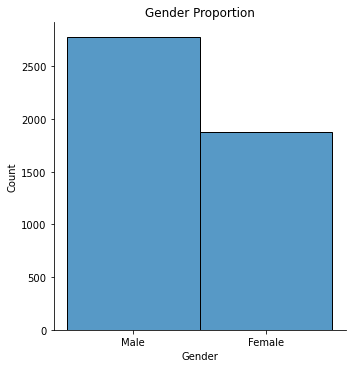

In [19]:
gender_plot=sns.displot(data=df_employees, x="Gender").set(title="Gender Proportion")
gender_plot

As we can see in this graph, there are more men than women in our data, and we would be interested in searching this field of gender differences.

We'll look the the spread of the cities in our data:

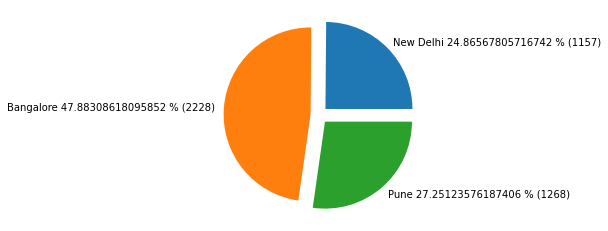

In [20]:
l,a=list(set(df_employees["City"])),[]
for i in range(len(l)):
    a.append(list(df_employees["City"]).count(l[i]))
    l[i]=l[i]+ " "+ str(list(df_employees["City"]).count(l[i])*100/len(df_employees["City"]))+ " % (" +str(list(df_employees["City"]).count(l[i]))+ ")"
explode = (0.1, 0.1, 0.1)
plt.pie(a,labels=l, explode=explode)
plt.show()

Now let's check the distribution of experience and age:

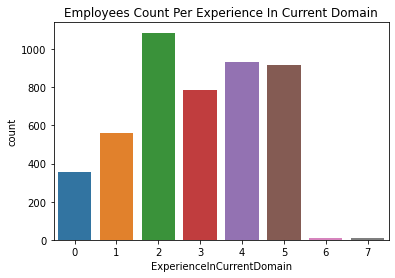

In [21]:
sns.countplot(data=df_employees, x="ExperienceInCurrentDomain").set(title="Employees Count Per Experience In Current Domain");

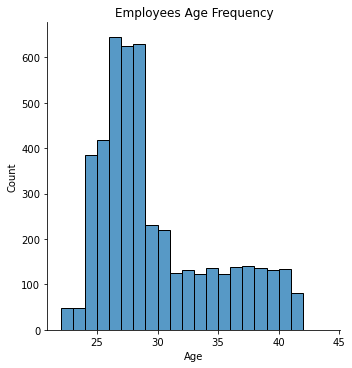

In [22]:
sns.displot(data=df_employees, x="Age", bins = np.arange(22,45,1)).set(title="Employees Age Frequency")

We can see that big part of the employees are at age in the range of [24,30]

We also want to see the distribution of benched employees agains never-benched employees

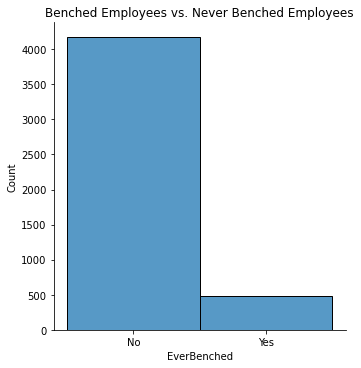

In [23]:
sns.displot(data=df_employees, x="EverBenched").set(title="Benched Employees vs. Never Benched Employees")

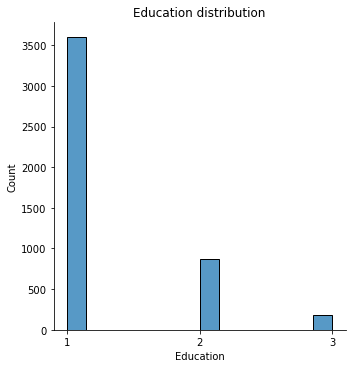

In [24]:
sns.displot(data=df_employees, x="Education").set(title="Education distribution", xticks=list(range(1,4)))

We can see that only a little group of employees were benched for more than a month.


## b.

We would like to see the correlation between gender and salary level average:

In [25]:
payment_mean_by_gender = df_employees.groupby('Gender' ,as_index=False)['SalaryLevel'].mean()
payment_mean_by_gender


,Gender,SalaryLevel
0,Female,0.462400
1,Male,0.193305


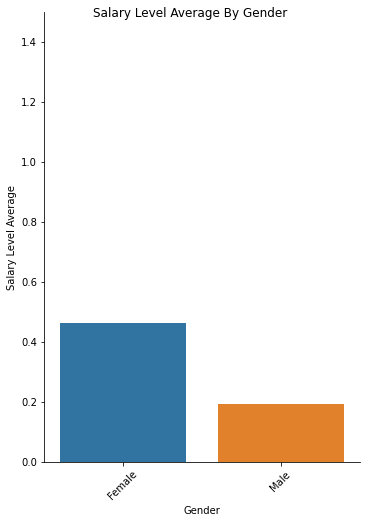

In [26]:
facetgrid_obj = sns.catplot(kind='bar', data=payment_mean_by_gender, x='Gender', y='SalaryLevel')
facetgrid_obj.set_xticklabels(rotation=45)
facetgrid_obj.fig.suptitle('Salary Level Average By Gender')
facetgrid_obj.set(xlabel='Gender', ylabel='Salary Level Average')
#facetgrid_obj
facetgrid_obj.fig.set_size_inches(5, 7)
facetgrid_obj.set(ylim=(0,1.5))

We see that the average salary level is much higher for women.
<br>
Yet, we cant conclude anything about individuals salary or the gender's actual salary mean, since salary level is a categorial variable, and it doesn't tell us more than that.
<br>
However, since the male's average salary level is around 0.2, we may assume that a big part of the men in the company get a salary level 0. And as for women, although it looks like they receive much higher salary compared to men, the average salary level is only 0.5.
<br><br>
We insisted to set the y-axis limits to be [0,1.5] so we can both see the difference, and also to see that both values are relatively low.

We also want to check the average of salary level among the different education degrees:

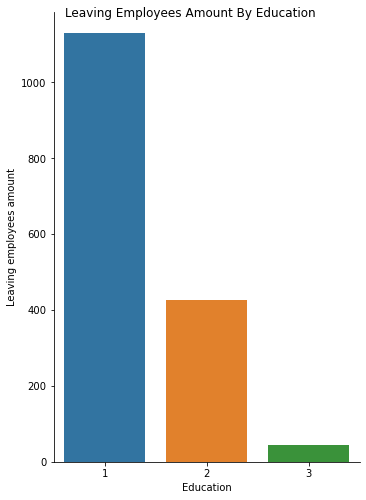

In [27]:
leave_by_education = df_employees.groupby('Education' ,as_index=False)['LeaveOrNot'].sum()
leave_by_education
facetgrid_obj = sns.catplot(kind='bar', data=leave_by_education, x='Education', y='LeaveOrNot')
facetgrid_obj.fig.suptitle('Leaving Employees Amount By Education')
facetgrid_obj.set(xlabel='Education', ylabel='Leaving employees amount')
facetgrid_obj.fig.set_size_inches(5, 7)
#facetgrid_obj.set(ylim=(0,0.6))

We see that there is a negative correlation between the 2 variables

For last, we tested the leaving ratio among each gender:

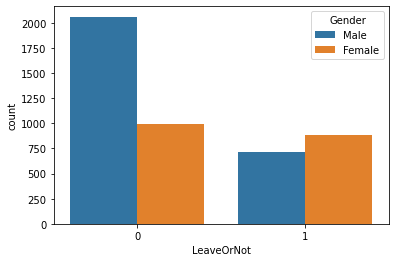

In [28]:
sns.countplot(data = df_employees ,x='LeaveOrNot',hue='Gender');

# 3. Estimation and hypothesis testing

We would like to explore the possibility of Inequality on the basis of gender. 

We know that women are 48% of the population in india, so we want to run simulations that will test wether the company takes the gender as a consideration. We will take the women percetage within the company workers, and will check the p-value of the women percentage, under the assumption that the proportion of woman in the company is similiar to the one in all india.

We wanted to explore that question, because we think this is a very important subject that we care about a lot.

H0-The proportion of employment of woman corresnpond to the proportion of women in the country.

H1- The proportion of employment of woman is lower than the proportion of women in the country


In [29]:
real_population = 0.48
df_employees["Gender"].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

In [30]:
employees_num=4653
women_prop_in_data=1875/employees_num

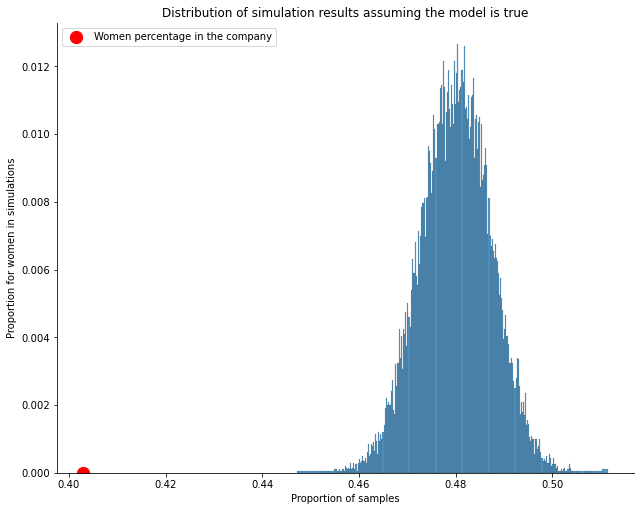

In [31]:
gender = ['man', 'woman'] # possible genders
prob_for_gender = [0.52, 0.48] # probabilities GIVEN THE MODEL IS TRUE
sample_size = employees_num # number of sampled
number_of_women_from_real_data = 1875 # Number of women in our observation

# simulate one value
def prob_woman(): #simulates a 4653-legth vector (as the company's employees number)
    sample_shows = np.random.choice(gender, p=prob_for_gender, size=sample_size)
    num_women = np.count_nonzero(sample_shows == 'woman')
    return num_women/sample_size #winning chance

# run 20000 simulations
num_repetitions = 20000
many_prob_woman = np.empty(num_repetitions) # collection array
for i in range(num_repetitions):
    many_prob_woman[i] = prob_woman()

# plot the empirical distribution of the statistic
facetgrid_obj = sns.displot(many_prob_woman, bins=np.unique(many_prob_woman), stat='probability')
facetgrid_obj.fig.set_size_inches(10, 7)
facetgrid_obj.set(title='Distribution of simulation results assuming the model is true', xlabel=f'Proportion of samples', ylabel='Proportion for women in simulations')

prob_win_in_data = 1875/employees_num 
facetgrid_obj.axes[0, 0].scatter(prob_win_in_data, 0, s=150, color='red')  # draw observed value
facetgrid_obj.axes[0, 0].legend(['Women percentage in the company']);

In [32]:
num_simulations_like_data_or_more_extreme = np.count_nonzero(many_prob_woman <= prob_win_in_data) 
print (f'The p-value is {num_simulations_like_data_or_more_extreme/num_repetitions}')

The p-value is 0.0


We got p<0.05, which means that the observed case (the red point) is part of the 5% tail of the empirical distribution. Therefore, assuming significance level of 0.05 (and even less), we will reject the null hypothesis. That is, we can reject the hypothesis that the women part in the company doesn't compatible with their part in India's population- a thing that may be caused by a discrimination, but we can know for sure.

# 4. Prediction or Clustering

We would like to explore the subject of benching, and try to predict whether future candidate would benched.
<br>
In order to test it and to be able to compare it to a candidate, we would take only the personal information of the employees, since the proffessional data could be irrelevant or invalid

In [33]:
encoded_df = pd.get_dummies(df_employees, columns=['Gender', 'EverBenched', "City"], drop_first=True)
encoded_df.replace({'Education': {'Bachelors': 1, 'Masters': 2, 'PHD': 3}}, inplace=True)
encoded_df


,Education,JoiningYear,SalaryLevel,Age,ExperienceInCurrentDomain,LeaveOrNot,Gender_Male,EverBenched_Yes,City_New Delhi,City_Pune
0,1,2017,0,34,0,0,1,0,0,0
1,1,2013,2,28,3,1,0,0,0,1
2,1,2014,0,38,2,0,0,0,1,0
3,2,2016,0,27,5,1,1,0,0,0
4,2,2017,0,24,2,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
4648,1,2013,0,26,4,0,0,0,0,0
4649,2,2013,1,37,2,1,1,0,0,1
4650,2,2018,0,27,5,1,1,0,1,0
4651,1,2012,0,30,2,0,1,1,0,0


In [34]:
df_columns = encoded_df.columns
scaler = MinMaxScaler()
scaled_np_matrix = scaler.fit_transform(encoded_df)
scaled_encoded_df = pd.DataFrame(scaled_np_matrix, columns=df_columns)
scaled_encoded_df.insert(10, 'Target', df_employees['LeaveOrNot'])
scaled_encoded_df.drop(columns=["LeaveOrNot"], inplace=True)
scaled_encoded_df

,Education,JoiningYear,SalaryLevel,Age,ExperienceInCurrentDomain,Gender_Male,EverBenched_Yes,City_New Delhi,City_Pune,Target
0,0.0,0.833333,0.0,0.631579,0.000000,1.0,0.0,0.0,0.0,0
1,0.0,0.166667,1.0,0.315789,0.428571,0.0,0.0,0.0,1.0,1
2,0.0,0.333333,0.0,0.842105,0.285714,0.0,0.0,1.0,0.0,0
3,0.5,0.666667,0.0,0.263158,0.714286,1.0,0.0,0.0,0.0,1
4,0.5,0.833333,0.0,0.105263,0.285714,1.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
4648,0.0,0.166667,0.0,0.210526,0.571429,0.0,0.0,0.0,0.0,0
4649,0.5,0.166667,0.5,0.789474,0.285714,1.0,0.0,0.0,1.0,1
4650,0.5,1.000000,0.0,0.263158,0.714286,1.0,0.0,1.0,0.0,1
4651,0.0,0.000000,0.0,0.421053,0.285714,1.0,1.0,0.0,0.0,0


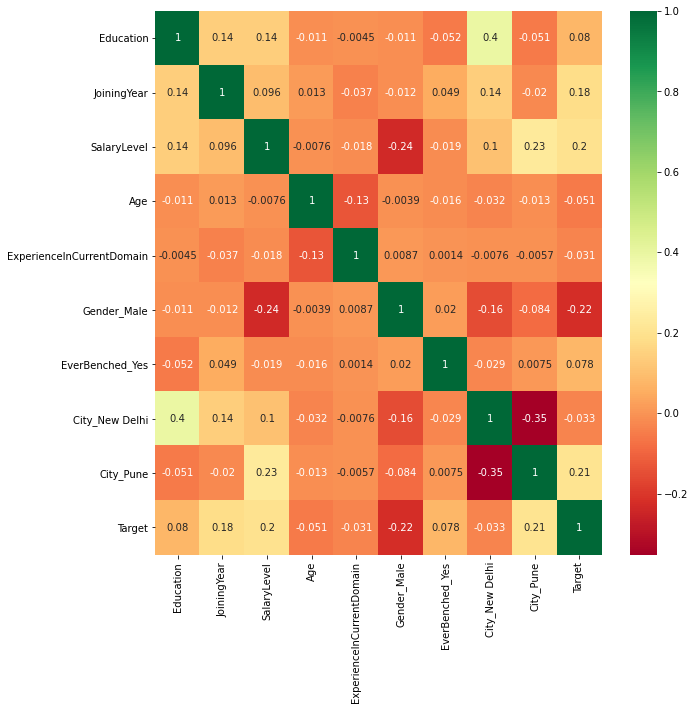

In [35]:
# plot heat map
correlations = scaled_encoded_df.corr()
plt.figure(figsize=(10,10))
g=sns.heatmap(correlations,annot=True,cmap="RdYlGn")

We want to delete variables with very low correlation to our target variable (LeaveOrNot).

In [36]:
df_prediction=scaled_encoded_df.drop(columns=['Education', 'Age', 'EverBenched_Yes'], inplace=False)
df_prediction

,JoiningYear,SalaryLevel,ExperienceInCurrentDomain,Gender_Male,City_New Delhi,City_Pune,Target
0,0.833333,0.0,0.000000,1.0,0.0,0.0,0
1,0.166667,1.0,0.428571,0.0,0.0,1.0,1
2,0.333333,0.0,0.285714,0.0,1.0,0.0,0
3,0.666667,0.0,0.714286,1.0,0.0,0.0,1
4,0.833333,0.0,0.285714,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...
4648,0.166667,0.0,0.571429,0.0,0.0,0.0,0
4649,0.166667,0.5,0.285714,1.0,0.0,1.0,1
4650,1.000000,0.0,0.714286,1.0,1.0,0.0,1
4651,0.000000,0.0,0.285714,1.0,0.0,0.0,0


In [37]:
X = df_prediction.iloc[:, df_prediction.columns!="Target"].values
Y = df_prediction.iloc[:, -1].values

In [38]:
X

array([[0.83333333, 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.16666667, 1.        , 0.42857143, 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.        , 0.28571429, 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.71428571, 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.28571429, 1.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.57142857, 1.        , 0.        ,
        0.        ]])

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
#The function returns 4 values
print('X train set size: ' + str(X_train.shape))
print('X_test set size: ' + str(X_test.shape))
print('Y_train set size: ' + str(Y_train.shape)) #The label of the train (class)
print('Y_test set size: ' + str(Y_test.shape)) #The label of the test (class)

X train set size: (3722, 6)
X_test set size: (931, 6)
Y_train set size: (3722,)
Y_test set size: (931,)


Now we normalize our data:

In [40]:
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test) #Withoit fit!!
scaled_X_train

array([[0.5       , 0.        , 0.        , 1.        , 0.        ,
        1.        ],
       [0.33333333, 0.        , 0.28571429, 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.5       , 0.28571429, 0.        , 0.        ,
        1.        ],
       ...,
       [0.83333333, 0.        , 0.71428571, 0.        , 1.        ,
        0.        ],
       [0.5       , 0.5       , 0.57142857, 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.        , 0.42857143, 1.        , 0.        ,
        0.        ]])

In [41]:
def find_optimal_k():

    my_array=[]
    optimal_k=0
    for i in range(1,30):
        knn_cv = KNeighborsClassifier(n_neighbors=i)

        # Train model using the cross-validation method using 5 groups (cv=5) 
        cv_scores = cross_val_score(knn_cv, scaled_X_train, Y_train, cv=5) # (model, features, labels, k)
        my_array.append(cv_scores.mean())

    
    for j in range(len(my_array)):
        if my_array[j]>=my_array[optimal_k]:
            optimal_k=j
    print("The optimal number of neighbors is:", optimal_k)
    return optimal_k

opt_k=find_optimal_k()
knn2=KNeighborsClassifier(n_neighbors=opt_k)
knn2.fit(scaled_X_train, Y_train)
print("Our best score:", knn2.score(scaled_X_test, Y_test))



The optimal number of neighbors is: 14
Our best score: 0.8152524167561761


In [42]:
classifier = knn2.predict(X=scaled_X_test)
cmtx = pd.DataFrame(
    confusion_matrix(Y_test, classifier, labels=[0, 1]), 
    index=['real: 0', 'real: 1'], columns=['pred: 0', 'pred: 1']
)
print(cmtx)

         pred: 0  pred: 1
real: 0      572       36
real: 1      136      187


In [43]:
print(f"Accuracy score is:{accuracy_score(Y_test, classifier)}")
print(f"Precision score is:{precision_score(Y_test, classifier)}") #How many of my positive predictions are correct
print(f"recall score is:{recall_score(Y_test, classifier)}") #How many of the actual positive values I have successfully predicted
print(f"f1 score is:{f1_score(Y_test, classifier)}") #F1 score is harmonic average of precision and recall

Accuracy score is:0.8152524167561761
Precision score is:0.8385650224215246
recall score is:0.5789473684210527
f1 score is:0.684981684981685
